# Modelos de 1, 3 y 5 factores 

Fuente :  https://www.pwlcapital.com/wp-content/uploads/2020/12/Five-Factor-Investing-with-ETFs.pdf%20z

## 5 factor model

$$Stock = \sum_{t=1} \frac{E(d_{t+1})}{(1+r)^t}$$


*Miller Modigliani Proposition*

Los dividendos no importan, en realidad son solo dinero que tiene la empresa. De las ganancias vienen las inversiones en equipo, etc. 

$$E(d_{t+1}) = E(Profits_{t+1} - dB_{t+1}) $$


Juntando todo
$$Stock = \sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}$$

Escalando por el valor en libros:

$$\frac{Stock}{B_t} = \frac{\sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}}{B_t}$$


$r$ es lo que imorta


1- *Value premium*: 1- Si dejamos todo constante, excepto $r$ y $\frac{stock}{B_t}$ significa que empresas con precio bajo necesariamente tienen mejor $r$

2-  *Profitability premium*: Si dejamos todo constante excepto $Profits_{t+1}$  y $r$ significa que las empresas que ganan más deben tener mejor $r$

3- *Investment premium* Si dejamos todo constante excepto $dB_{t+1}$ y $r$ entonces las compañias que gastan menos, tienen un mayor $r$


Instalar paquete

In [1]:
# Descargar factores

import pandas_datareader.data as web
import datetime
from sklearn.metrics import r2_score
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definir las fechas de inicio y fin
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Descargar los factores Fama-French desde la web de Ken French
ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)
ff_factores
#ff_factors.head()

/tmp/ipykernel_16840/3308229380.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)
/tmp/ipykernel_16840/3308229380.py:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)


{0:          Mkt-RF   SMB   HML   RMW   CMA    RF
 Date                                         
 1980-01    5.51  1.83  1.75 -1.70  1.64  0.80
 1980-02   -1.22 -1.57  0.61  0.04  2.68  0.89
 1980-03  -12.90 -6.93 -1.01  1.46 -1.19  1.21
 1980-04    3.97  1.05  1.06 -2.10  0.29  1.26
 1980-05    5.26  2.11  0.38  0.34 -0.31  0.81
 ...         ...   ...   ...   ...   ...   ...
 2023-05    0.35 -0.38 -7.72 -1.81 -7.22  0.36
 2023-06    6.46  1.34 -0.26  2.18 -1.62  0.40
 2023-07    3.21  2.86  4.11 -0.57  0.57  0.45
 2023-08   -2.39 -3.65 -1.06  3.43 -2.37  0.45
 2023-09   -5.24 -1.79  1.52  1.87 -0.82  0.43
 
 [525 rows x 6 columns],
 1:       Mkt-RF    SMB    HML    RMW    CMA     RF
 Date                                           
 1980   22.13   4.84 -24.61  13.83 -12.35  11.24
 1981  -18.13   7.30  25.04  -1.42  10.84  14.71
 1982   10.66   7.24  13.29  -4.23  17.71  10.54
 1983   13.75  12.21  20.52   0.59  15.98   8.80
 1984   -6.05  -8.27  19.13  15.18   3.64   9.85
 1985   24.91

In [16]:
factors_df=ff_factores[0]/100
factors_df.index = factors_df.index.to_timestamp()
factors_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1980-01-01,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0080
1980-02-01,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0089
1980-03-01,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,0.0121
1980-04-01,0.0397,0.0105,0.0106,-0.0210,0.0029,0.0126
1980-05-01,0.0526,0.0211,0.0038,0.0034,-0.0031,0.0081


In [19]:
factors_df.mean()*12

Mkt-RF    0.083853
SMB       0.010347
HML       0.025028
RMW       0.047217
CMA       0.031876
RF        0.039158
dtype: float64

In [20]:
#el capm no predice eso; esto son rendimientos

In [22]:
#le puedes poner cualquier smb, hml y te dice
import numpy as np
np.mean(factors_df.RMW > 0)

0.5916030534351145

In [17]:
# Escalar y transformar factores
ff_factors[0]/100
#porque esta en porcentaje, por eso sobre 100

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1980-01,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0080
1980-02,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0089
1980-03,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,0.0121
1980-04,0.0397,0.0105,0.0106,-0.0210,0.0029,0.0126
1980-05,0.0526,0.0211,0.0038,0.0034,-0.0031,0.0081
...,...,...,...,...,...,...
2023-04,0.0061,-0.0256,-0.0004,0.0242,0.0286,0.0035
2023-05,0.0035,-0.0038,-0.0772,-0.0181,-0.0722,0.0036
2023-06,0.0646,0.0134,-0.0026,0.0218,-0.0162,0.0040


In [23]:
# Descargar acciones
tickers = ['BRK-A', 'SPY', 'VB', 'VGT', 'VB',
          'AAPL', 'AMZN', 'MSFT', 'WMT']
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


In [26]:
# Ejemplo merge
df1 = pd.DataFrame({
    'user_id': ['A', 'B', 'D'],
    'monto': [1000, 2000, 3000]
})
df2 = pd.DataFrame({
    'user_id': ['A','E', 'D', 'Z' ],
    'monto': [1000, 1500, 3000, 3000]
})

In [27]:
# Juntar datos 
df1

,user_id,monto
0,A,1000
1,B,2000
2,D,3000


In [28]:
df2

,user_id,monto
0,A,1000
1,E,1500
2,D,3000
3,Z,3000


In [31]:
#juntas df1 & df2
df3= pd.merge(df1, df2,on='user_id' )
df3

,user_id,monto_x,monto_y
0,A,1000,1000
1,D,3000,3000


In [32]:
#Juntar datos
df = pd.merge(rt, factors_df, on='Date')
df.head()

,AAPL,AMZN,BRK-A,MSFT,SPY,VB,VGT,WMT,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,
2004-03-01,0.130434,0.006278,-0.012698,-0.060309,-0.016693,0.008000,-0.025820,0.002182,-0.0132,0.0210,0.0027,0.0156,-0.0098,0.0009
2004-04-01,-0.046597,0.007394,0.000965,0.048134,-0.015482,-0.047024,-0.054312,-0.042920,-0.0183,-0.0201,-0.0310,0.0345,-0.0284,0.0008
2004-05-01,0.088440,0.112385,-0.047007,0.003827,0.017124,0.021028,0.049161,-0.022281,0.0117,-0.0038,-0.0025,-0.0118,0.0003,0.0006
2004-06-01,0.159658,0.121650,-0.000562,0.088830,0.014797,0.037725,0.020145,-0.055735,0.0186,0.0256,0.0118,0.0120,-0.0039,0.0008
2004-07-01,-0.006146,-0.284559,-0.019112,-0.002451,-0.028686,-0.061112,-0.084782,0.009715,-0.0406,-0.0295,0.0324,0.0532,-0.0166,0.0010


### Crea el CAPM con el S&P500, ¿Qué concluyes?




In [38]:
spy_f = df.copy()
spy_f['spy_minus_rf']= spy_f['SPY']- spy_f['RF']

X = spy_f[['Mkt-RF']]
y = spy_f[['spy_minus_rf']]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.9794429396960032

# Ahora con Berkshiere

In [40]:
# Accion minus RF 
brk_f = df.copy()
brk_f['brk_minus_rf']= brk_f['BRK-A']-brk_f['RF']

X = brk_f[['Mkt-RF']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.35507832163244357

In [400]:
# CAPM


# Calcular R2

0.35507832163244357

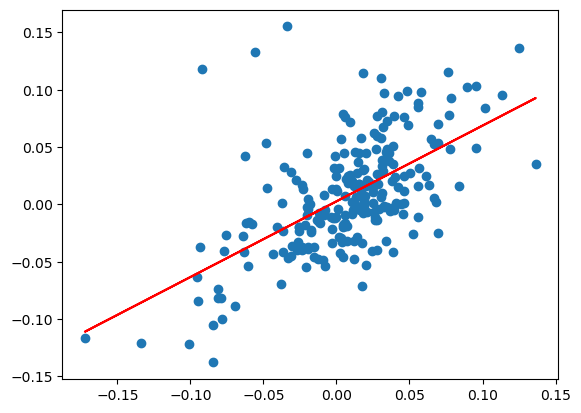

In [41]:
# Plot CAPM 
plt.scatter(X, y)
plt.plot(X, predictions, 'red')

## Fama french con Berkshiere

In [42]:
df.keys()

Index(['AAPL', 'AMZN', 'BRK-A', 'MSFT', 'SPY', 'VB', 'VGT', 'WMT', 'Mkt-RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF'],
      dtype='object')

In [43]:
# FAMA french; accion minus RF
brk_f = df.copy()
brk_f['brk_minus_rf']= brk_f['BRK-A']-brk_f['RF']

X = brk_f[['Mkt-RF', 'SMB', 'HML']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

# R2 


0.44050712135492487

# 5 factor model con Berkshiere

In [44]:
# 5 factor model
brk_f = df.copy()
brk_f['brk_minus_rf']= brk_f['BRK-A']-brk_f['RF']

X = brk_f[['Mkt-RF', 'SMB', 'HML', 'CMA', 'RMW']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

# R2


0.44143963514647044

### El de 5 factores varia muy poquito realmente, no es mucho

In [47]:
# Correr todos los modelos
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']] 

    # CAPM 
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model 
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}
    
    
    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}
    
    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary
#hace todo y corre todo, esto es como para confirmar para el examen o para algún trabajo

### Las empresas más chicas ganan más; tienen más riesgos y por lo menos les va mejor.

In [48]:
# Como es con CAPM
run_all_models(df, 'BRK-A')

{'CAPM': {'BETAS': {"['Mkt-RF']": [0.660357003845217]},
  'R2': 0.35507832163244357},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [0.7136224564648204,
    -0.4359527533147112,
    0.41138945960879036]},
  'R2': 0.44050712135492487},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [0.7195419365960634,
    -0.4443516523059492,
    0.38299077157731326,
    -0.047644924321798454,
    0.0843270532598792]},
  'R2': 0.44143963514647044}}

In [49]:
run_all_models(df, 'AMZN')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.2206838039463046]},
  'R2': 0.2572202565068963},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.349274181251441,
    0.013170724476087137,
    -1.221057534197913]},
  'R2': 0.38671981754956797},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2959775241703202,
    -0.11994268075022335,
    -0.9723496421507536,
    -0.32975187711965603,
    -0.5716629140532989]},
  'R2': 0.39612186474508215}}

### con el de 5 factores es de 0.39; siempre sera un poquito más grande

In [50]:
# Como es con 3 factors
run_all_models(df, 'AMZN')['3 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.349274181251441,
   0.013170724476087137,
   -1.221057534197913]},
 'R2': 0.38671981754956797}

In [51]:
# Como es con 5 factors
run_all_models(df, 'AMZN')['5 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2959775241703202,
   -0.11994268075022335,
   -0.9723496421507536,
   -0.32975187711965603,
   -0.5716629140532989]},
 'R2': 0.39612186474508215}

## Crea un portafolio con 50% apple y 50% amazon
¿Qué concluyes?

In [52]:
df['apple_amazon']= 0.5*df['AAPL'] + 0.5*df['AMZN']

run_all_models(df, 'apple_amazon')['CAPM']

{'BETAS': {"['Mkt-RF']": [1.2125189211022496]}, 'R2': 0.41273614360477906}

In [53]:
run_all_models(df, 'apple_amazon')['3 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3376247550214377,
   -0.12102468601718752,
   -0.9098721857362636]},
 'R2': 0.5373223300325827}

In [54]:
run_all_models(df, 'apple_amazon')['5 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.297586783466012,
   -0.11910240233728281,
   -0.7196262067204848,
   0.12275392036705411,
   -0.5210435952639227]},
 'R2': 0.5466871307143331}

### R2: nivel de explicabilidad de tu modelo. El CAPM explica un 41%, mientras que el 3 factors ell 1.33%...

## Crea un portafolio con (1/3) apple, (1/3) amazon 6(1/3) microsoft
¿Qué concluyes?


In [55]:
df['apple_amazon_msft']= (1/3)*df['AAPL'] + (1/3)*df['AMZN'] + (1/3)*df['MSFT']

run_all_models(df, 'apple_amazon_msft')['CAPM']

{'BETAS': {"['Mkt-RF']": [1.1174481668523846]}, 'R2': 0.5059471154871347}

In [56]:
run_all_models(df, 'apple_amazon_msft')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1174481668523846]},
  'R2': 0.5059471154871347},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.2524513132884654,
    -0.2737200452195465,
    -0.6844689441651317]},
  'R2': 0.6252350614435083},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2182319003861988,
    -0.2822798473523843,
    -0.5222119605952199,
    0.06782861120099849,
    -0.4361534382307902]},
  'R2': 0.6343663433126485}}

### El nivel va aumentando; tus acciones pertenecen al mercado, mientras mas acciones, se explican mejor tus rendimientos. El R2 se aproxime al 1

## Crea un portafolio con (1/4) apple, (1/4) amazon, (1/4) microsoft, (1/4) Walmart
¿Qué concluyes?


In [57]:
df['apple_amazon_msft_wmt']= (1/4)*df['AAPL'] + (1/4)*df['AMZN'] + (1/4)*df['MSFT'] + (1/4)*df['WMT']

In [59]:
run_all_models(df, 'apple_amazon_msft_wmt')

{'CAPM': {'BETAS': {"['Mkt-RF']": [0.9316160202194714]},
  'R2': 0.5413624696697963},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0612296169883855,
    -0.331876285775738,
    -0.5135980539142676]},
  'R2': 0.6647088226129763},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0467889554953191,
    -0.3044186355364473,
    -0.44408591360868077,
    0.14156003605083844,
    -0.21197948232281721]},
  'R2': 0.6697418716784865}}

### el R2 ahora es 66%; aquí se esta comparando el VGT con VTI, el de 5 es el peorcito, no tiene mucho caso, mejor el de 3 y luego el de CAPM.